<a href="https://colab.research.google.com/github/tomunizua/summative_bananaguard/blob/main/Summative_Intro_to_ml_TheodoraOmunizua_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [34]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
from PIL import Image
import tensorflow as tf
import itertools
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [12]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)

# 1. Load data from CSV (one CSV per split)
train_df = pd.read_csv('/content/dataset/train/_annotations.csv')  # Replace with your train CSV path
valid_df = pd.read_csv('/content/dataset/valid/_annotations.csv')  # Replace with your valid CSV path
test_df = pd.read_csv('/content/dataset/test/_annotations.csv')  # Replace with your test CSV path

# 2. Label Encoding (fit only on training data)
le = LabelEncoder()
train_df['class_encoded'] = le.fit_transform(train_df['class'])  # Fit and transform
valid_df['class_encoded'] = le.transform(valid_df['class'])  # Transform only
test_df['class_encoded'] = le.transform(test_df['class'])  # Transform only

# 3. Image Loading and Dataset Creation
def load_image(image_path):
    image_string = tf.io.read_file(image_path)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image_resized = tf.image.resize(image_decoded, [128, 128])  # Resize if needed
    return image_resized

def create_dataset(df, train_image_folder):
    image_paths = df['filename'].apply(lambda x: os.path.join(train_image_folder, x)).tolist()
    labels = df['class_encoded'].tolist()

    # Convert to TensorFlow tensors *before* creating the dataset
    image_paths_tensor = tf.constant(image_paths)
    labels_tensor = tf.constant(labels)

    # Create the dataset using a *tuple*
    dataset = tf.data.Dataset.from_tensor_slices((image_paths_tensor, labels_tensor))

    def process_path(image_path, label):
        image = load_image(image_path)
        return image, label

    dataset = dataset.map(process_path)
    return dataset

train_image_folder = '/content/dataset/train/images' # Path to your train images folder
valid_image_folder = '/content/dataset/valid/images' # Path to your valid images folder
test_image_folder = '/content/dataset/test/images' # Path to your test images folder

train_dataset = create_dataset(train_df, train_image_folder) # Pass image folder
valid_dataset = create_dataset(valid_df, valid_image_folder) # Pass image folder
test_dataset = create_dataset(test_df, test_image_folder) # Pass image folder


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [13]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import load_model

In [14]:
# 4. Model Definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),  # Added more Conv layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  # Increased units
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')  # Output layer
])

# 5. Model Compilation (No optimizer if required by assignment)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Batching (as before)
train_dataset = train_dataset.batch(32)
valid_dataset = valid_dataset.batch(32)
test_dataset = test_dataset.batch(32)

# 7. Training with History
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10) #, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]) # Add early stopping if needed

# def define_model(optimization: string, regularization_datatype, early_stopping: bool, dropout: float, learning_rate: float):
#   model= None
#   model.add(None)
#   #TO DO: Add more layers as per architecture
#   model.add(None) # Last Layer
#   model.compile(optimizer = optimizerNone)
#   model.fit(None)
#   return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6445 - loss: 684.5511 - val_accuracy: 0.4539 - val_loss: 130.6149
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6497 - loss: 34.5135 - val_accuracy: 0.7270 - val_loss: 0.4869
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6329 - loss: 21.5166 - val_accuracy: 0.9645 - val_loss: 0.1279
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9157 - loss: 0.4961 - val_accuracy: 0.4539 - val_loss: 6.7341
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7614 - loss: 2.4955 - val_accuracy: 0.7411 - val_loss: 1.0507
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7954 - loss: 1.6273 - val_accuracy: 0.9894 - val_loss: 0.0665
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9288 - loss: 0.7360 - val_accuracy: 0.9255 - val_loss: 0.1871
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9540 - loss: 0.1305 - val_accuracy: 0.4539 - val

# Task: Print out the Final Model Accuracy and plot the Loss curve

Test accuracy: 0.957, Train accuracy: 0.985


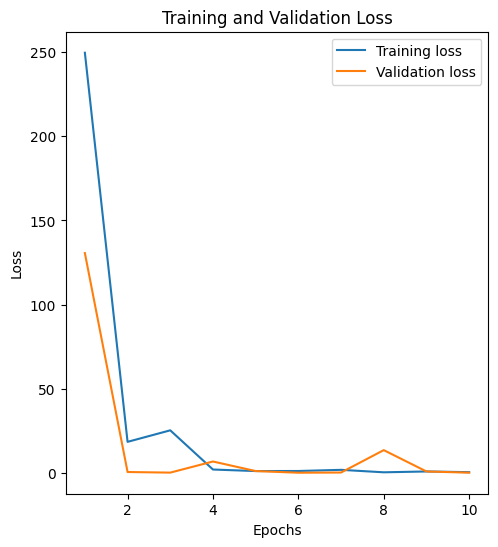

In [19]:
# 8. Evaluation
_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))

# 9. Plotting Function (Loss and Accuracy Curves)
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # plt.subplot(1, 2, 2)  # Accuracy plot
    # plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
    # plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
    # plt.title('Training and Validation Accuracy')
    # plt.xlabel('Epochs')
    # plt.ylabel('Accuracy')
    # plt.legend()

    # plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7378 - loss: 59.8758 - val_accuracy: 0.9965 - val_loss: 0.0764
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9815 - loss: 0.1404 - val_accuracy: 0.9645 - val_loss: 0.3035
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9688 - loss: 0.1648 - val_accuracy: 0.9468 - val_loss: 0.2653
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9800 - loss: 0.0736 - val_accuracy: 0.9823 - val_loss: 0.1054
Test accuracy: 0.972, Train accuracy: 0.995


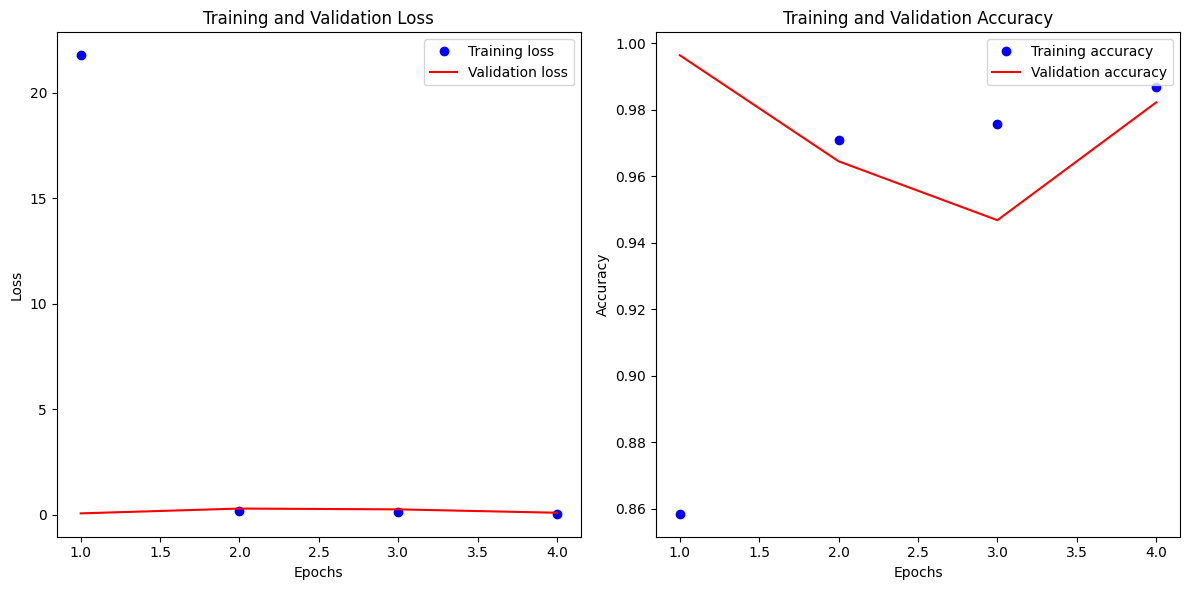

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


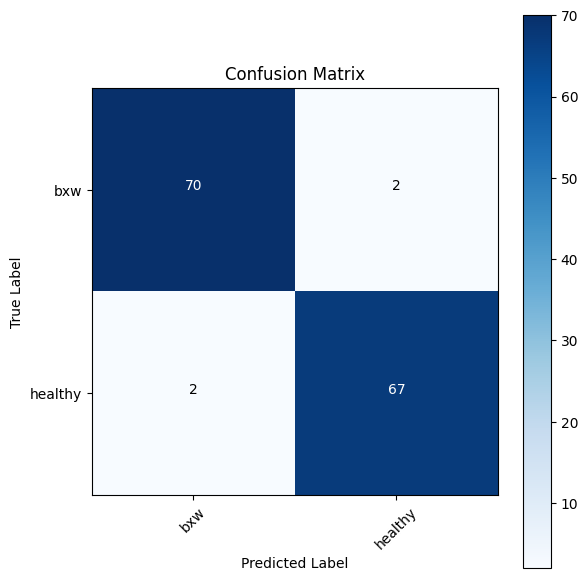

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
              precision    recall  f1-score   support

         bxw       0.97      0.97      0.97        72
     healthy       0.97      0.97      0.97        69

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



In [24]:
def model_2():
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))  # Dropout layer added
    model.add(tf.keras.layers.Dense(len(le.classes_), activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adam optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 3. Create the model
model = model_2()

# 5. Training with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)  # Define early stopping
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[early_stopping])

# 8. Evaluation
_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))

# 6. Plotting Function (Loss and Accuracy Curves)
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# 7. Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# 8. Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5470 - loss: 401.1296 - val_accuracy: 0.4539 - val_loss: 94.3537
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6432 - loss: 13.1516 - val_accuracy: 0.9681 - val_loss: 0.6561
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6849 - loss: 4.5580 - val_accuracy: 0.4539 - val_loss: 3.2326
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8377 - loss: 1.7755 - val_accuracy: 0.9858 - val_loss: 0.4624
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8164 - loss: 2.5815 - val_accuracy: 0.9858 - val_loss: 0.3674
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9590 - loss: 0.4836 - val_accuracy: 0.9610 - val_loss: 0.3589
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9239 - loss: 0.7837 - val_accuracy: 0.9433 - val_loss: 0.4146
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9813 - loss: 0.2733 - val_accuracy: 0.9894 - val_loss: 0.2169

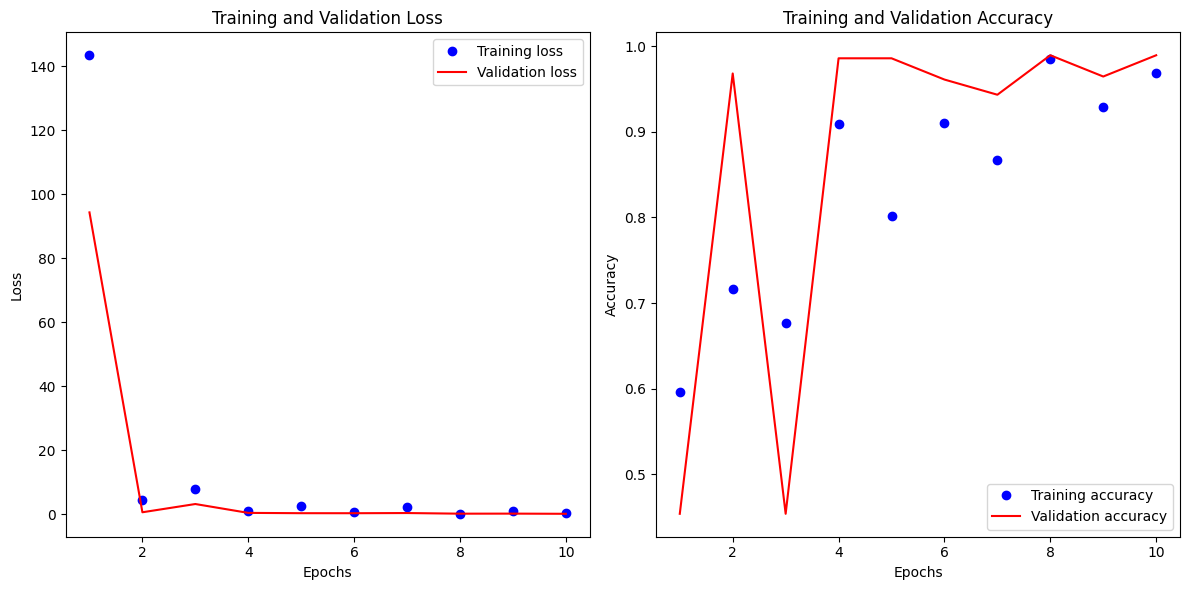

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


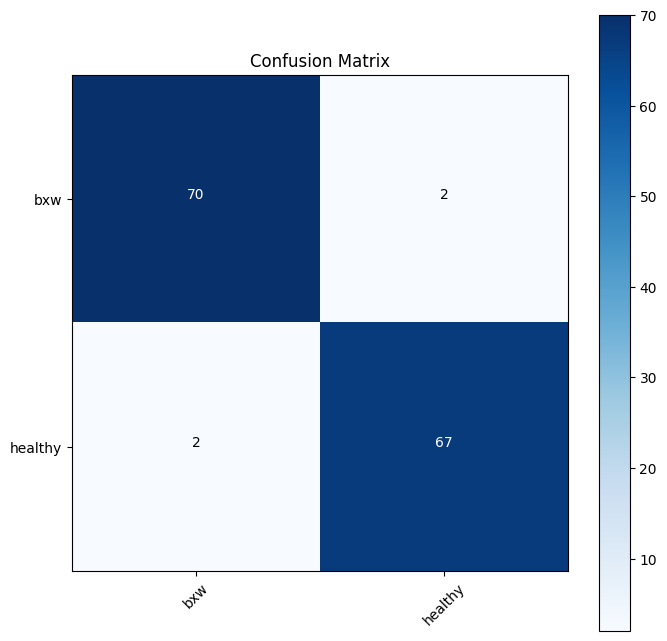

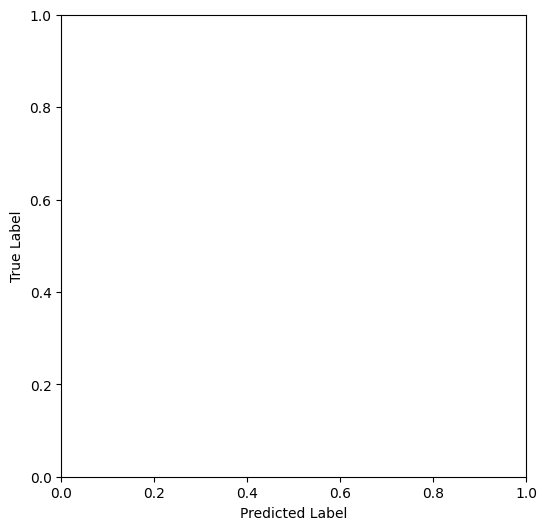

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
              precision    recall  f1-score   support

         bxw       0.97      0.97      0.97        72
     healthy       0.97      0.97      0.97        69

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



In [25]:
def model_3():
    model = tf.keras.models.Sequential()

    regularizer = tf.keras.regularizers.l2(0.001)  # L2 regularization

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.5))  # Dropout layer

    model.add(tf.keras.layers.Dense(len(le.classes_), activation='softmax'))

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)  # RMSprop optimizer

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 3. Create the model
model = model_3()

# 5. Training
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[early_stopping])

# 8. Evaluation
_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))

# 6. Plotting Function (Loss and Accuracy Curves)
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# 7. Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# 8. Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report



Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6250 - loss: 67.5766 - val_accuracy: 0.9752 - val_loss: 52.4782
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9147 - loss: 52.7153 - val_accuracy: 0.9752 - val_loss: 52.4374
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9470 - loss: 52.5285 - val_accuracy: 0.9858 - val_loss: 52.4037
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9662 - loss: 52.4474 - val_accuracy: 0.9823 - val_loss: 52.4062
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9786 - loss: 52.3946 - val_accuracy: 0.9894 - val_loss: 52.3645
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9703 - loss: 52.3827 - val_accuracy: 0.9823 - val_loss: 52.3621
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9758 - loss: 52.3463 - val_accuracy: 0.9894 - val_loss: 52.3166
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9759 - loss: 52.3235 - val_accuracy: 0.9

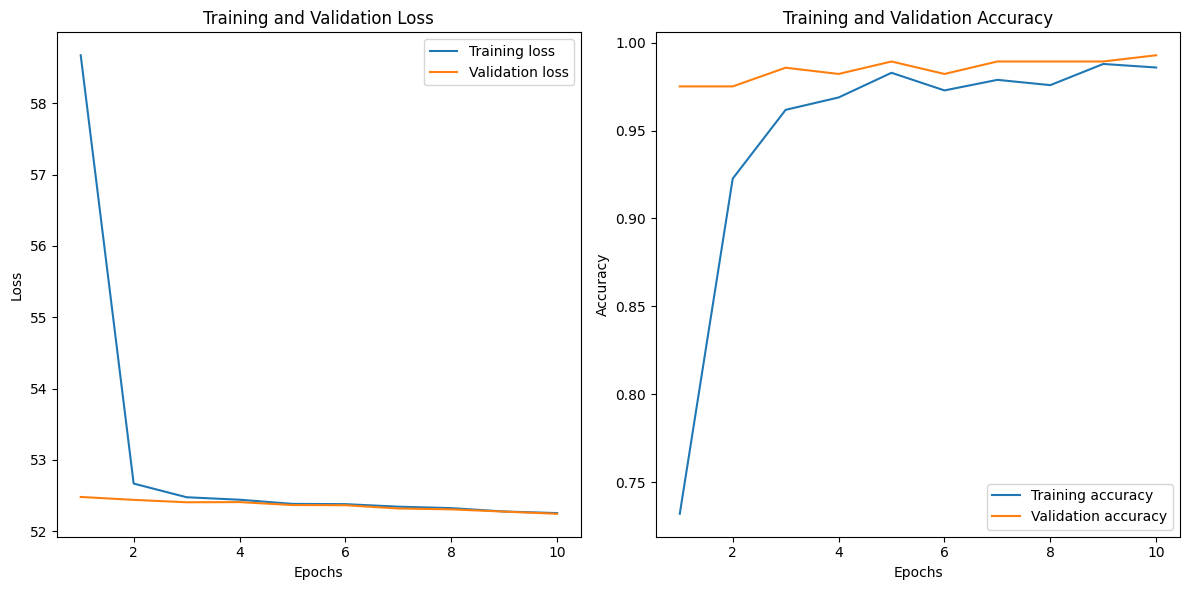

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


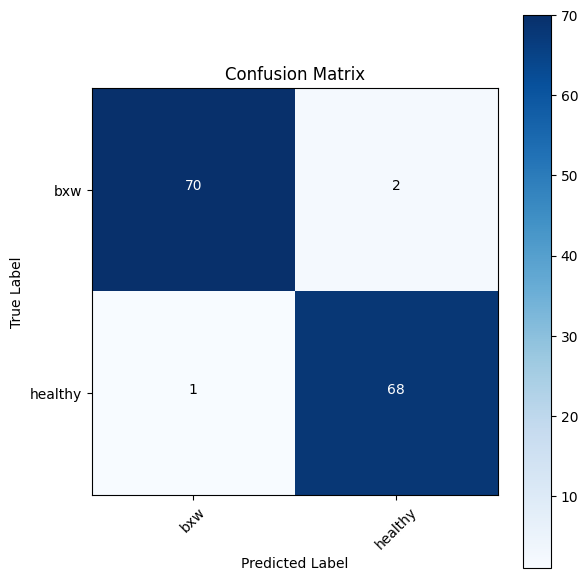

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
              precision    recall  f1-score   support

         bxw       0.99      0.97      0.98        72
     healthy       0.97      0.99      0.98        69

    accuracy                           0.98       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.98      0.98      0.98       141



In [28]:
def model_3():
    model = tf.keras.models.Sequential()

    regularizer = tf.keras.regularizers.l1(0.001)  # L1 regularization

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.5))  # Dropout layer

    model.add(tf.keras.layers.Dense(len(le.classes_), activation='softmax'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)  # RMSprop optimizer

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 3. Create the model
model = model_3()

# 5. Training
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[early_stopping])

# 8. Evaluation
_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))

# 6. Plotting Function (Loss and Accuracy Curves)
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# 7. Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# 8. Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report



              precision    recall  f1-score   support

         bxw       0.99      0.99      0.99        72
     healthy       0.99      0.99      0.99        69

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



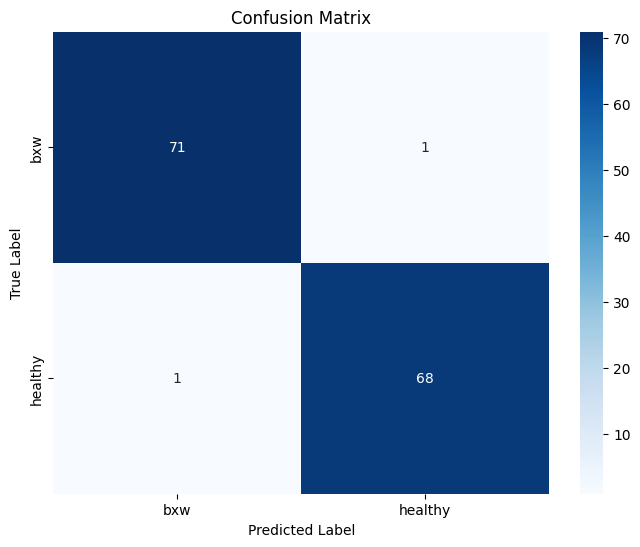

In [33]:

# 1. Data Loading and Preprocessing (Separate for Train, Validation, Test)
# *************************************************************************
# **SUBSTITUTE:** Replace with the actual paths to your data folders
# *************************************************************************
data_folders = {
    'train': '/content/dataset/train',  # Path to your train folder
    'validation': '/content/dataset/valid',  # Path to your validation folder
    'test': '/content/dataset/test'  # Path to your test folder
}

datasets = {}

for split, folder in data_folders.items():
    # *********************************************************************
    # **SUBSTITUTE:** Replace 'data.csv' with the actual name of your CSV file
    # *********************************************************************
    csv_path = os.path.join(folder, '_annotations.csv')
    # *********************************************************************
    # **SUBSTITUTE:** Replace 'images' with the actual name of your images subfolder
    # *********************************************************************
    image_folder = os.path.join(folder, 'images')
    df = pd.read_csv(csv_path)

    if split == 'train':
        le = LabelEncoder()
        # *****************************************************************
        # **SUBSTITUTE:** Replace 'class' with the actual name of your class column
        # *****************************************************************
        df['class_encoded'] = le.fit_transform(df['class'])
    else:
        df['class_encoded'] = le.transform(df['class'])

    image_data = []
    for filename in df['filename']:
        image_path = os.path.join(image_folder, filename)
        try:
            img = plt.imread(image_path)
            img_resized = tf.image.resize(img, [128, 128]).numpy()  # Resize images
            image_data.append(img_resized)
        except FileNotFoundError:
            print(f"Warning: Image not found: {image_path}")
            continue

    image_data = np.array(image_data)
    n_samples = image_data.shape[0]
    image_data_flattened = image_data.reshape(n_samples, -1)
    df_new = pd.DataFrame(image_data_flattened)
    df_new['class_encoded'] = df['class_encoded'].iloc[:n_samples].values

    datasets[split] = df_new

# 2. Prepare Data for Logistic Regression
X_train = datasets['train'].drop('class_encoded', axis=1)
y_train = datasets['train']['class_encoded']

X_validation = datasets['validation'].drop('class_encoded', axis=1)
y_validation = datasets['validation']['class_encoded']

X_test = datasets['test'].drop('class_encoded', axis=1)
y_test = datasets['test']['class_encoded']

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# 4. Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Evaluate the Model
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

# Improved Confusion Matrix Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(None)
    # Make predictions
    predictions = None
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
